<a href="https://colab.research.google.com/github/DevanshA2511/NYC_Taxi_trip_time_predection/blob/main/NYC_Taxi_Trip_Time_Prediction_ML_Capstone_Project_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NYC Taxi Trip Time Prediction




##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Devansh Saini


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Predecting the total ride duration of taxi trips in New York City based on the dataset  released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import datetime as dt
import warnings; warnings.simplefilter('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
taxi_df = pd.read_csv('/content/drive/MyDrive/data /NYC Taxi Data.csv')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
taxi_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
row_count = taxi_df.shape[0]  # Returns number of rows
print(f"No. of Rows : {row_count}")
col_count = taxi_df.shape[1]  # Returns number of columns
print(f'No. of Columns : {col_count}')

No. of Rows : 1458644
No. of Columns : 11


### Dataset Information

In [ ]:
# Dataset Info
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicates = sum(taxi_df.duplicated())
print(f'No. of duplicate values in dataset are {duplicates}')

No. of duplicate values in dataset are 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
total_null = taxi_df.isna().sum().sum()
print(f'Total Null values present are : {total_null}')
taxi_df.isna().sum().sort_values(ascending = False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

Total Null values present are : 0


,Columns,Null values
0,id,0
1,vendor_id,0
2,pickup_datetime,0
3,dropoff_datetime,0
4,passenger_count,0
5,pickup_longitude,0


<Axes: >

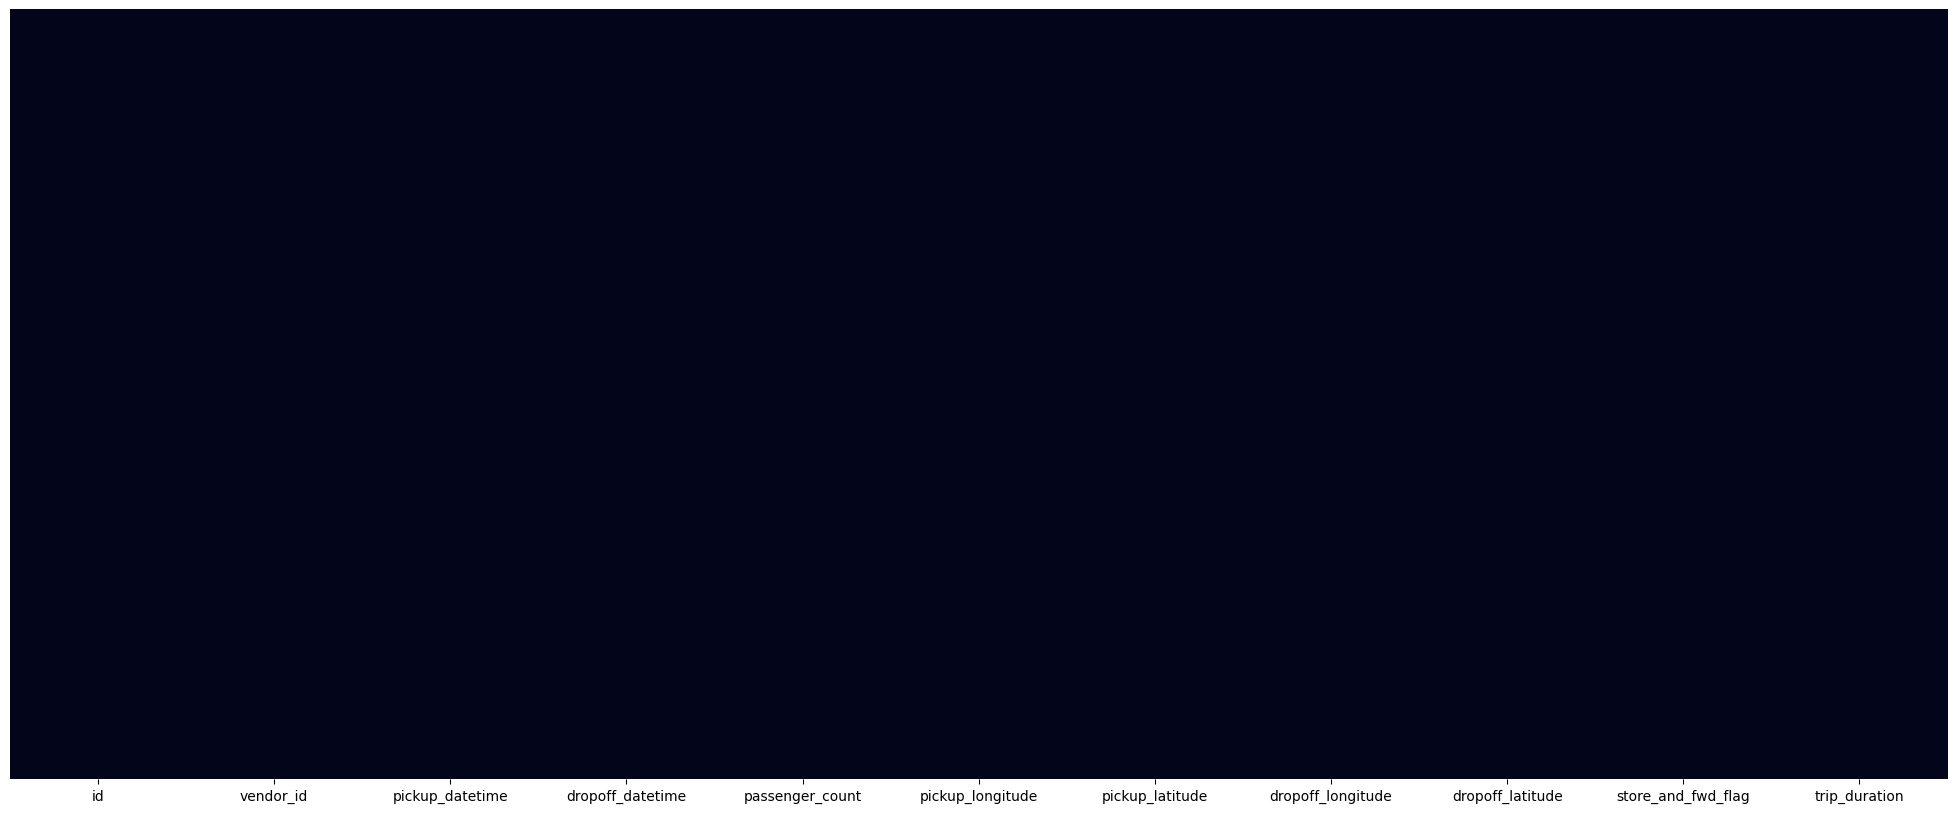

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(25, 10))
sns.heatmap(taxi_df.isnull(),cbar = False, yticklabels = False)

### What did you know about your dataset?

*From the above heatmap and data analysis i can say that:*
1. There are 1458644 rows and 11 coloumns in the dataset.

2. A total of 0 ***duplicate*** values are present in the dataset.

3. A total of 0 ***Null*** values are present in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(list(taxi_df.columns))

['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration']


In [ ]:
# Dataset Describe
taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description

1. **id** - a unique identifier for each trip

2. **vendor_id** - a code indicating the provider associated with the trip record

3. **pickup_datetime** - date and time when the meter was engaged

4. **dropoff_datetime** - date and time when the meter was disengaged

5. **passenger_count** - the number of passengers in the vehicle (driver entered value)

6. **pickup_longitude** - the longitude where the meter was engaged

7. **pickup_latitude** - the latitude where the meter was engaged

8. **dropoff_longitude** - the longitude where the meter was disengaged

9. **dropoff_latitude** - the latitude where the meter was disengaged

10. **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

11. **trip_duration** - duration of the trip in seconds

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
taxi_df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

#Converting pickup_datetime, dropoff_datetime of the type 'object'. Convert it into type 'datetime'.
taxi_df['pickup_datetime'] = pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime'] = pd.to_datetime(taxi_df['dropoff_datetime'])


In [ ]:
#Creating new columns from pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	trip_duration for distnace and speed.

#importing geopy library
from geopy.distance import great_circle

#Creating the function for calculating distance between pickup and dropoff
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):

 start_coordinates=(pickup_lat,pickup_long)
 stop_coordinates=(dropoff_lat,dropoff_long)

 return great_circle(start_coordinates,stop_coordinates).km

#Applying the function to our dataset and creating the new column ‘distance’.
taxi_df['distance'] = taxi_df.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

#creating new column for Speed
taxi_df['speed'] = (taxi_df.distance*3600/(taxi_df.trip_duration))

In [ ]:
zero_count = (taxi_df['trip_duration'] == 0).sum()

# Print the result
print("Number of zeros:", zero_count)

Number of zeros: 0


In [ ]:
#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data
taxi_df['weekday'] = taxi_df['pickup_datetime'].dt.day_name()
taxi_df['month'] = taxi_df.pickup_datetime.dt.month
taxi_df['weekday_num'] = taxi_df.pickup_datetime.dt.weekday
taxi_df['pickup_hour'] = taxi_df.pickup_datetime.dt.hour

In [ ]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,distance,speed,pickup_time,dropoff_time,pickup_timeofday,dropoff_timeofday,weekday,month,weekday_num,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1.498523,11.856445,17:24:55,17:32:30,Late night,Late night,Monday,3,0,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,1.805510,9.803673,00:43:35,00:54:38,Late night,Late night,Sunday,6,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,6.385108,10.822216,11:35:24,12:10:48,Late night,Late night,Tuesday,1,1,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1.485501,12.465739,19:32:31,19:39:40,Late night,Late night,Wednesday,4,2,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1.188590,9.836608,13:30:55,13:38:10,Late night,Late night,Saturday,3,5,13


### What all manipulations have you done and insights you found?

1. There are no null values or duplicate values in the dataset.

2. Converted pickup_datetime, dropoff_datetime of the type 'object'. Convert it into type 'datetime' for better usage.

3. Created new columns from pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	trip_duration for distnace and speed.

4. Created a column for pickup time and drop off time in hours.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Number of Passengers per ride.


According to New York City Taxi Passenger Limit says:

* A maximum of 4 passengers can ride in traditional cabs.
* A child under 7 is allowed to sit on a passenger's lap in the rear seat in addition to the passenger limit.

So, in total we can assume that maximum 5 passenger can board the new york taxi i.e. 4 adult + 1 minor

In [ ]:
# Number of rides for diffrent number of passengers.
pd.options.display.float_format = '{:.2f}'.format #To suppress scientific notation.
taxi_df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

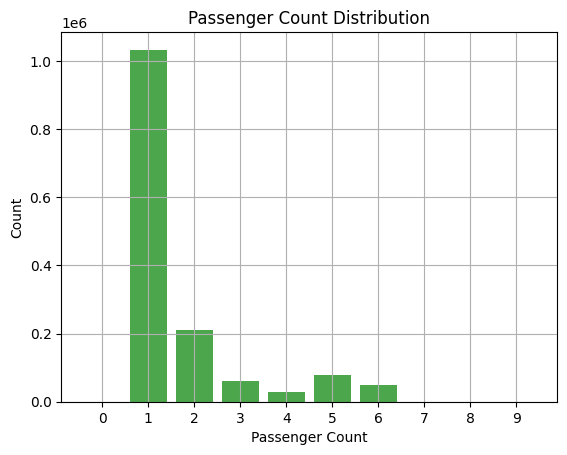

Text(0.5, 1.0, 'Passenger Count')

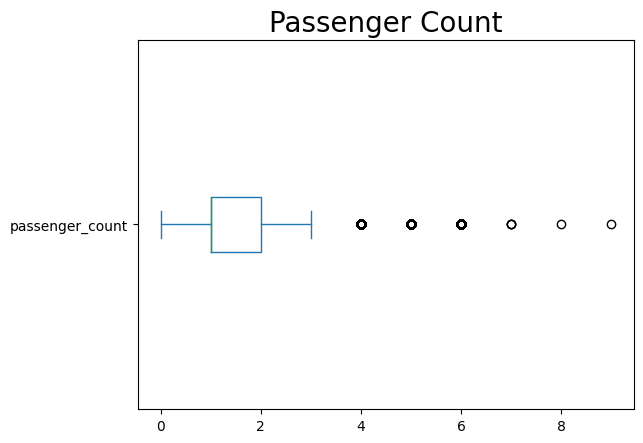

In [ ]:
# Chart - 1 visualization code

passenger_count = taxi_df['passenger_count']

# Counting the occurrences of each passenger count.
passenger_count_counts = passenger_count.value_counts()

# Sorting the counts by passenger count values.
passenger_count_counts = passenger_count_counts.sort_index()

# Creating a bar chart
plt.bar(passenger_count_counts.index, passenger_count_counts.values, color='green', alpha=0.7)
plt.xlabel('Passenger Count')
plt.ylabel('Count')
plt.title('Passenger Count Distribution')
plt.xticks(passenger_count_counts.index)
plt.grid(True)
plt.show()

# Creating a boxplot.
box = taxi_df['passenger_count'].plot(kind='box',vert = False,fontsize = 10)
box.set_title('Passenger Count',fontsize = 20)


##### 1. Why did you pick the specific chart?

* Box Plot and Bar Charts are excelent to show distribution of frequencies of values comprehensively and make them easy to compare the data and make it easier to gather insights from it.

##### 2. What is/are the insight(s) found from the chart?

* There are some trips with 0 passenger count.
* Few trips consisted of even 6, 7, 8 or 9 passengers. Clear outliers and
 pointers to data inconsistency
* Most of trip consist of passenger either 1 or 2.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  The majority of trips consist of either 1 or 2 passengers suggests that optimizing vehicle fleet size to accommodate smaller groups could be cost-effective. Smaller vehicles or rideshare options might be considered to cater to these common trip sizes, potentially reducing operational costs.

* Trips with 0 passengers may indicate issues with data quality or recording. It's essential to investigate and rectify these cases as they can lead to incorrect billing, negative customer experiences, or even fraudulent activities. Negative customer experiences can result in loss of trust and loyalty.

#### Chart - 2: Trip Duaration

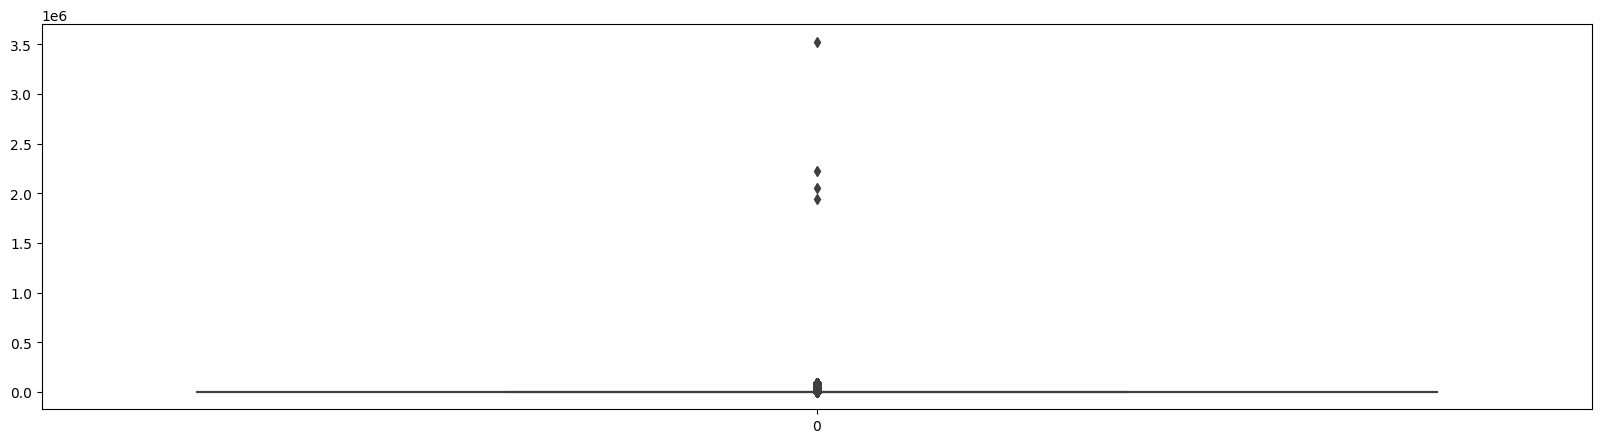

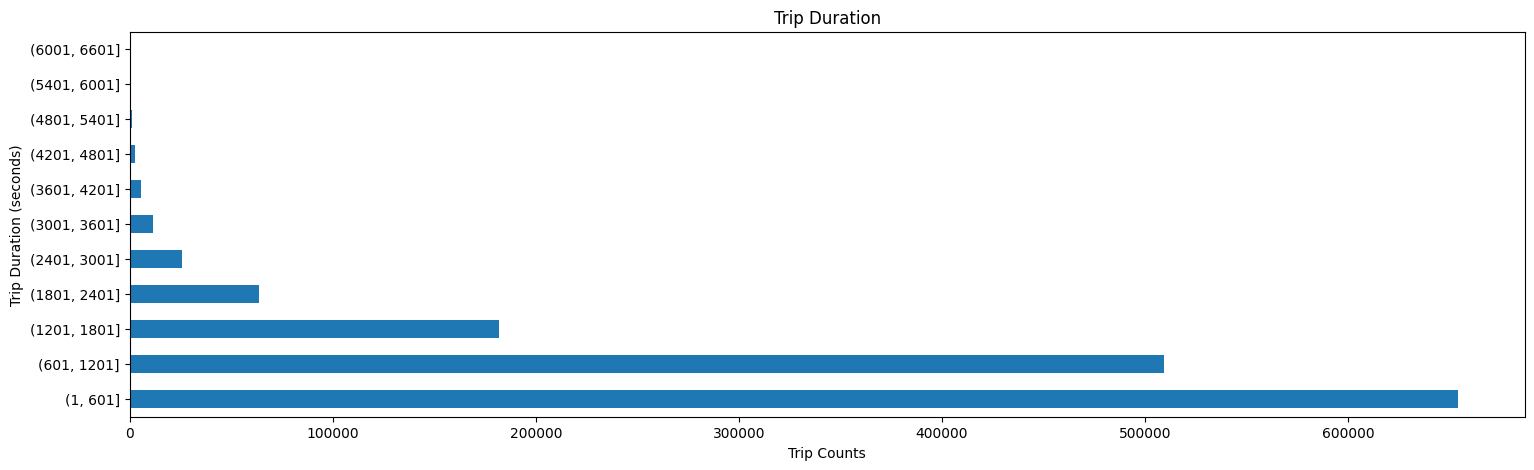

In [ ]:
# Chart - 2 visualization code
# Setting the figure size for the boxplot
plt.figure(figsize=(20, 5))

# Creating a boxplot for the 'trip_duration' column in the DataFrame 'df'
sns.boxplot(taxi_df.trip_duration)

# Displaying the boxplot
plt.show()

# Groupping 'trip_duration' into intervals and count the number of trips in each interval
# Ploting the counts as a horizontal bar chart
taxi_df.trip_duration.groupby(pd.cut(taxi_df.trip_duration, np.arange(1, 7200, 600))).count().plot(kind='barh', figsize=(18, 5))

# Setting the title, x-axis label, and y-axis label for the bar chart
plt.title('Trip Duration')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')

# Displaying the bar chart
plt.show()

##### 1. Why did you pick the specific chart?

* Horizontal Bar Charts are excelent to show distribution of frequencies of large values comprehensively and make them easy to compare the data and make it easier to gather insights from it.

##### 2. What is/are the insight(s) found from the chart?

* We can observe that most of the trips took 0 - 30 mins to complete i.e. approx 1800 secs.
* Some trip durations are over 100000 seconds which are clear outliers and should be removed.
* There are some durations with as low as 1 second. which points towards trips with 0 km distance.
* Major trip durations took between 10-20 mins to complete.
* Mean and mode are not same which shows that trip duration distribution is skewed towards right

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* There are trips that ran for more than 20 days, which seems unlikely by the distance travelled.
* All the trips are taken by vendor 1 which points us to the fact that this vendor might allows much longer trip for outstations.
* All these trips are either taken on Tuesday's in 1st month or Saturday's in 2nd month. There might be some relation with the weekday, pickup location, month and the passenger.
* But they fail our purpose of correct prediction and bring inconsistencies in the algorithm calculation.


#### Chart - 3: Which vendor is prefered more?

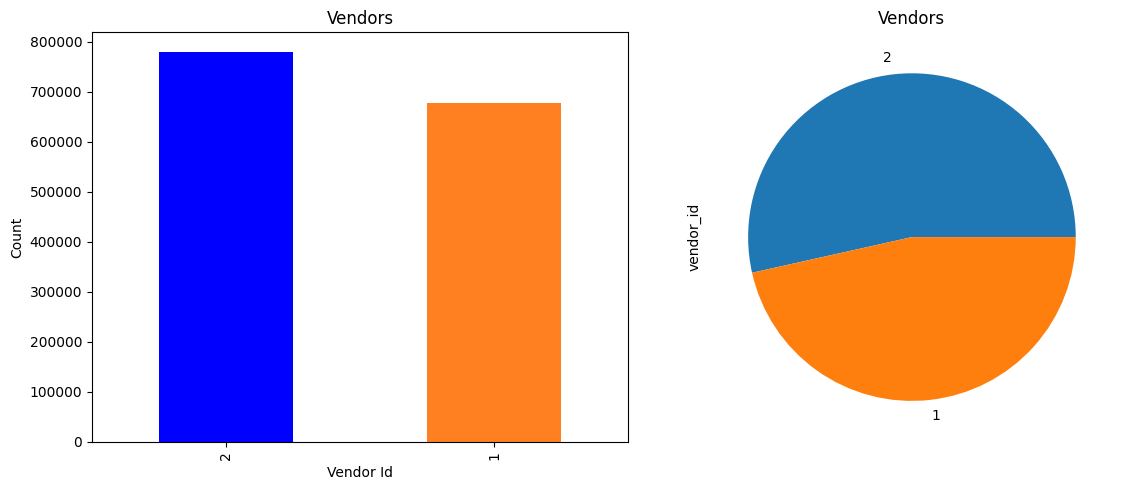

In [ ]:
# Chart - 3 visualization code
# Creating a 1x2 grid of subplots with a shared y-axis and set the figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting the count of 'vendor_id' values as a bar chart on the left subplot
ax = taxi_df['vendor_id'].value_counts().plot(kind='bar', title="Vendors", ax=axes[0], color=('blue', (1, 0.5, 0.13)))

# Plotting the count of 'vendor_id' values as a pie chart on the right subplot
taxi_df['vendor_id'].value_counts().plot(kind='pie', title="Vendors", ax=axes[1])

# Setting the y-axis label for the left subplot
ax.set_ylabel("Count")

# Setting the x-axis label for the left subplot
ax.set_xlabel("Vendor Id")

# Adjusting the layout to prevent overlap between subplots
fig.tight_layout()

# Displaying the subplots
plt.show()

##### 1. Why did you pick the specific chart?


* The pie chart can effectively represent the distribution of 'vendor_id' categories as parts of a whole in a visually intuitive manner.

##### 2. What is/are the insight(s) found from the chart?

* Vendor 2 is more popular the vendor 1 as it has a bit more number of rides in total.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Vendor 2 can be promoted more as it the more preferable mode.
* Vendor 1 can look into creating a more preferable platfromto attract customers.

#### Chart - 4: Distance travelled in most rides.

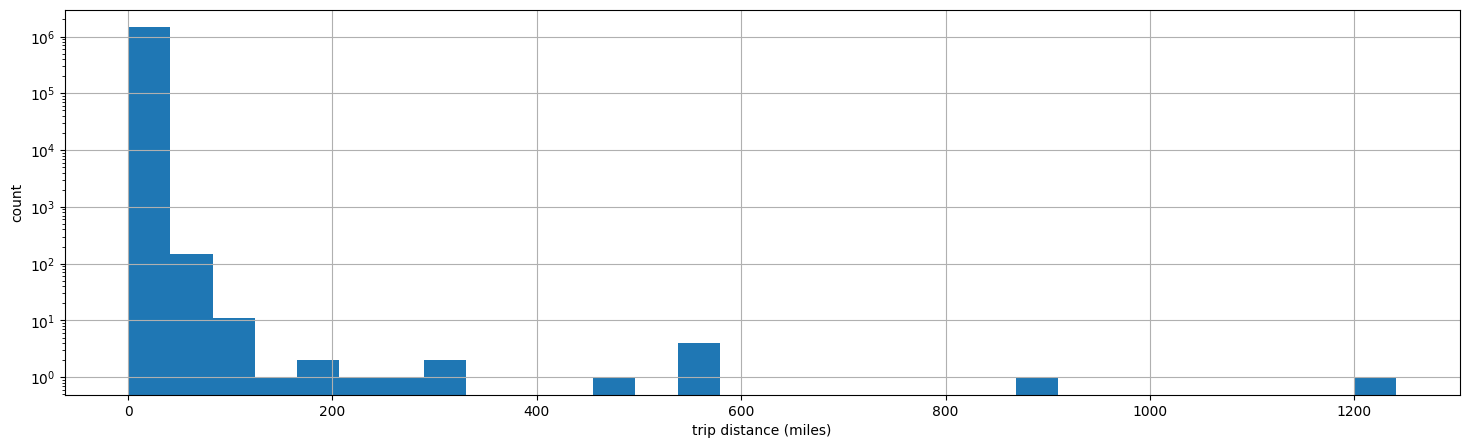

In [ ]:
# Chart - 4 visualization code
# Creating a histogram of 'distance' column with 30 bins( it takes about 30 miles to drive across the whole New York City, we decided to use 30 as the number to split the trips into short or long distance trips.) and set the figure size
ax = taxi_df['distance'].hist(bins=30, figsize=(18, 5))

# Setting the y-scale to logarithmic for better visualization of the data distribution
ax.set_yscale('log')

# Setting the x-axis label
ax.set_xlabel("trip distance (miles)")

# Setting the y-axis label
ax.set_ylabel("count")

# Displaying the histogram
plt.show()

In [ ]:
# Calculating trips with zero distance , short trips and long trips

print(f"There are {taxi_df.distance[taxi_df.distance == 0 ].count()} trip records with 0 miles distance")

df_short = taxi_df[taxi_df.distance <= 30].count()
df_long = taxi_df[taxi_df.distance > 30].count()
print(f"Short Trips: {df_short[0]} records in total.\nLong Trips: {df_long[0]} records in total.")

There are 5897 trip records with 0 miles distance
Short Trips: 1458071 records in total.
Long Trips: 573 records in total.


##### 1. Why did you pick the specific chart?

* Bar chart help in easily compare the frequncies and vizualize them.

##### 2. What is/are the insight(s) found from the chart?

* There some trips with over 60 miles distance.
* 5897 of the trips distance value is 0 miles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Around 6K trip record with distance equal to 0. Below are some possible explanation for such records.
1. Customer changed mind and cancelled the journey just after accepting it.
2. Software didn't recorded dropoff location properly due to which dropoff location is the same as the pickup location.
3. Issue with GPS tracker while the journey is being finished.
4. Driver cancelled the trip just after accepting it due to some reason. So the trip couldn't start
5. Or some other issue with the software itself which a technical guy can explain

#### Chart - 5: Speed of the taxi rides.

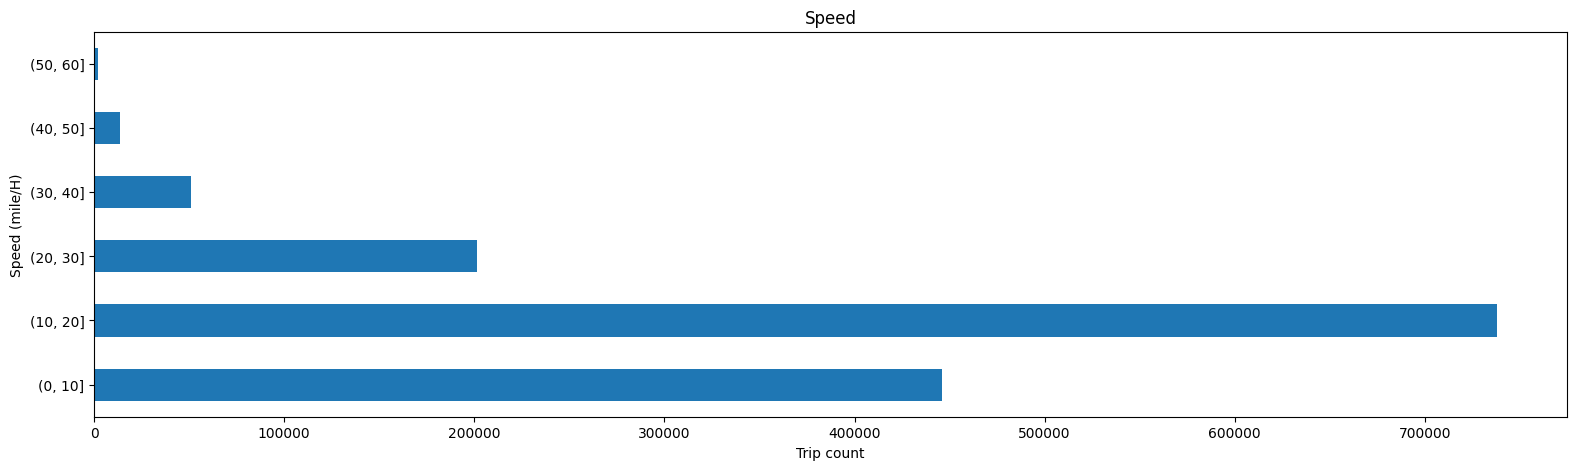

In [ ]:
# Chart - 5 visualization code
# Filter the DataFrame 'taxi_df' to include only rows where 'speed' is less than or equal to 65 mph since it is the upper speed limit and others can be considerd as outliers
taxi_df = taxi_df[taxi_df.speed <= 65]

# Group 'speed' into intervals of 10 mph and count the number of trips in each interval
# Plot the counts as a horizontal bar chart
taxi_df.speed.groupby(pd.cut(taxi_df.speed, np.arange(0, 65, 10))).count().plot(kind='barh', figsize=(19, 5))

# Set the x-axis label
plt.xlabel('Trip count')

# Set the y-axis label
plt.ylabel('Speed (mile/H)')

# Set the title of the plot
plt.title('Speed')

# Display the horizontal bar chart
plt.show()

##### 1. Why did you pick the specific chart?

* Horizontal bar plot helps in easily visualising and comparing a big data set.

##### 2. What is/are the insight(s) found from the chart?

* Trips over 15 miles/h are being considered as outliers but we cannot ignore them because they are well under the highest speed limit of 65 mile/h on state controlled highways.
* Mostly trips are done at a speed range of 6-12 miles/h with an average speed of around 8 miles/h

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* It is evident from this graph what we thought off i.e. most of the trips were done at a speed range of 6-12 miles/H which ensures safety of the passangers and builds trust with the customers.

#### Chart - 6: Total Trips per Hour

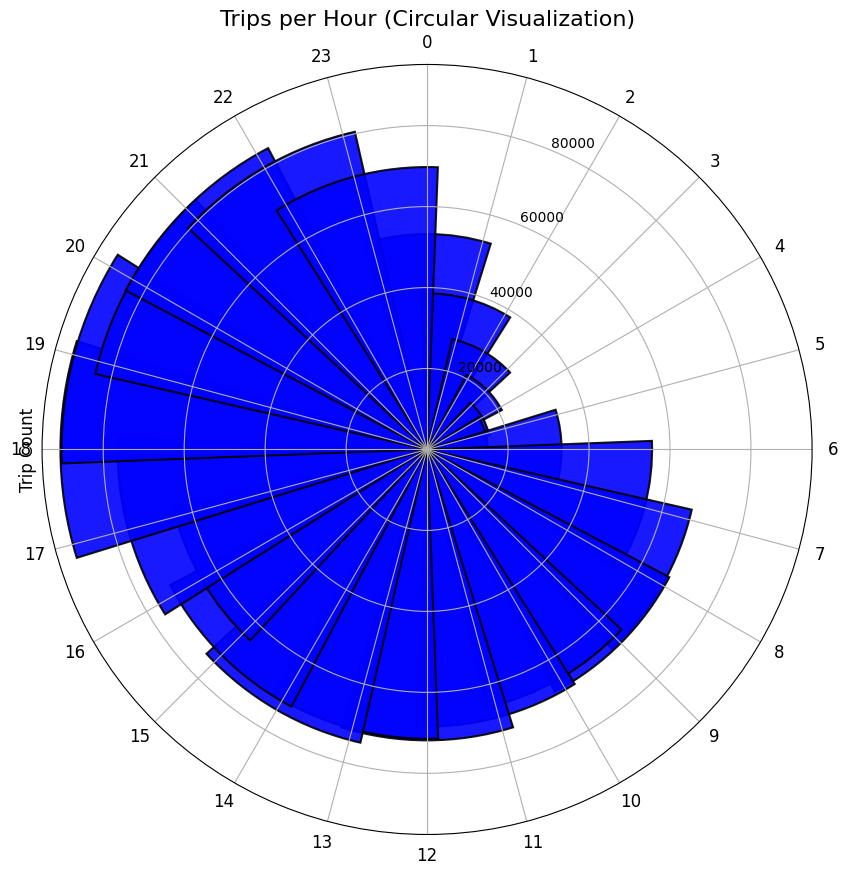

In [ ]:
# Chart - 6 visualization code
hourly_counts = taxi_df['pickup_hour'].value_counts().sort_index()

# Create a figure with polar coordinates and adjust the figure size
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Set the theta values (angles) for each hour of the day
theta = np.linspace(0, 2 * np.pi, len(hourly_counts), endpoint=False)

# Plot the radial bar chart with blue color
bars = ax.bar(theta, hourly_counts.values, width=0.6, bottom=0.0, color='blue', alpha=0.9, edgecolor='black', linewidth=1.5)

# Customize the radial plot
ax.set_xticks(theta)
ax.set_xticklabels(hourly_counts.index)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Add a title with larger font size
plt.title('Trips per Hour (Circular Visualization)', fontsize=16)

# Set y-axis label to "Trip Count"
ax.set_ylabel('Trip Count', fontsize=12)

# Improve the visibility of x-tick labels
ax.tick_params(axis='x', labelsize=12, pad=5)

# Show the radial plot
plt.show()


##### 1. Why did you pick the specific chart?

* The Circular Histogram helps in visually representing the distribution of taxi trips throughout the day, allowing for the identification of peak hours and patterns in trip activity.

##### 2. What is/are the insight(s) found from the chart?

* The above visualization is inline with the general trend of taxi pickups which starts increasing from 6AM in the morning and then declines from late evening i.e. around 8 PM. There is no unusual behavior here.
* The number of pickup is maximum at 5-8 pm.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The gained insight will help in allocating more number of taxis during rush hours and mange break time accordingly.

#### Chart - 7: Number of taxi trips over the week.


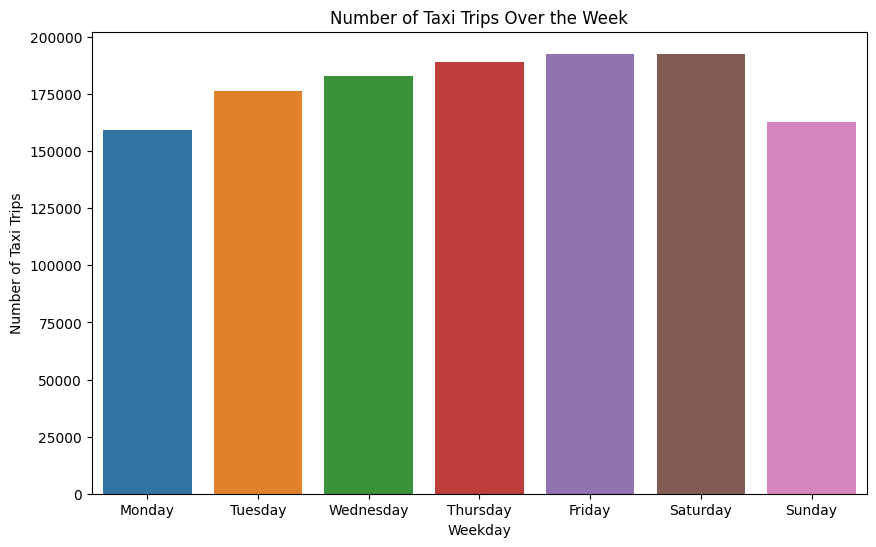

In [ ]:
# Chart - 7 visualization code

# Group the data by weekday_num and count the number of trips for each day
trips_per_weekday = taxi_df.groupby('weekday_num').size().reset_index(name='trip_count')

# Define the order of weekdays for proper sorting
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a bar plot for the number of trips over the week
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday_num', y='trip_count', data=trips_per_weekday, order=range(7))
plt.xlabel('Weekday')
plt.ylabel('Number of Taxi Trips')
plt.title('Number of Taxi Trips Over the Week')
plt.xticks(range(7), weekday_order)  # Replace numeric labels with weekday names
plt.show()

##### 1. Why did you pick the specific chart?

* A bar chart visually represents categorical data by using bars to compare and display information effectively.

##### 2. What is/are the insight(s) found from the chart?


* The data reveals a noticeable uptrend in taxi pickups from Monday through Friday. Conversely, there is a decline in pickups from Saturday through Monday, which aligns with the typical behavior of individuals choosing to rest at home over the weekend, especially those who commute to work during the weekdays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Businesses in the taxi or ride-sharing industry can allocate more resources and drivers on weekdays, particularly from Monday to Friday, to meet the higher demand for rides during these days.

* To further boost weekend business, companies can focus their marketing efforts on Saturdays and Sundays, targeting customers who prefer to relax and use taxi services for leisure activities or travel during these days.

#### Chart - 8: Taxi trip duration throughout the hours of the day.

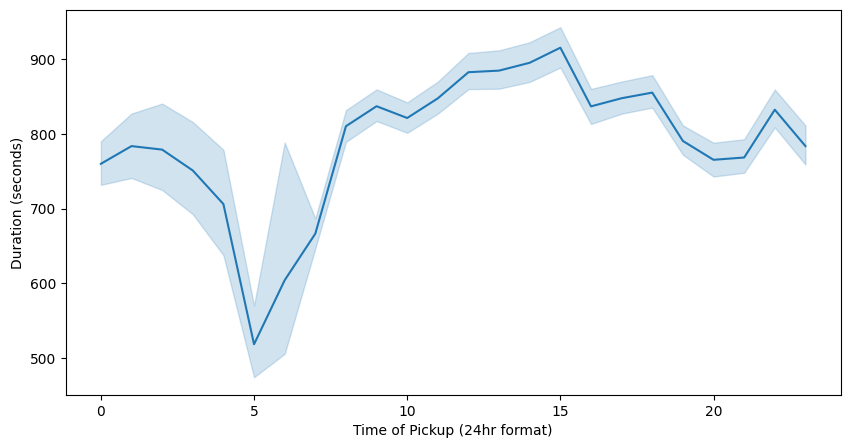

In [ ]:
# Chart - 8 visualization code
# Setting the figure size for the plot
plt.figure(figsize=(10, 5))

# Creating a lineplot to visualize the relationship between pickup hour and trip duration
sns.lineplot(x='pickup_hour', y='trip_duration', data=taxi_df)

# Labeling the x and y axes for clarity
plt.xlabel('Time of Pickup (24hr format)')  # Label for the x-axis
plt.ylabel('Duration (seconds)')  # Label for the y-axis

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?


* A line chart helps to show the relationship between two variables, typically to demonstrate trends or patterns over a continuous range or time.

##### 2. What is/are the insight(s) found from the chart?

* Average trip duration is lowest at 6 AM when there is minimal traffic on the roads.
* Average trip duration is generally highest around 3 PM during the busy streets.
* Trip duration on an average is similar during early morning hours i.e. before 6 AM & late evening hours i.e. after 6 PM.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Optimizing Off-Peak Hours Minimize resources and costs during early morning and late evening hours (before 6 AM and after 6 PM) when trip durations are similar and demand is lower.

* Peak Hour Focus Allocate more resources and drivers around 3 PM, the busiest time of day, to efficiently meet high-demand periods and enhance customer service.

* Promotions Strategy Introducing targeted promotions during early morning hours (e.g., 6 AM) to incentivize riders during low-traffic times and improve ridership.

#### Chart - 9: Taxi trip duration throughout the weekdays.

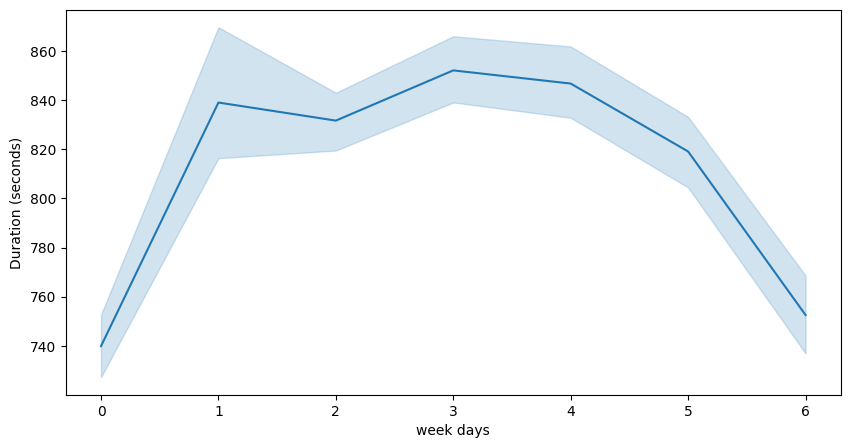

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize = (10,5))
sns.lineplot(x='weekday_num',y='trip_duration',data = taxi_df)
plt.ylabel('Duration (seconds)')
plt.xlabel('week days')
plt.show()

##### 1. Why did you pick the specific chart?

A line chart helps to show the relationship between two variables, typically to demonstrate trends or patterns over a continuous range or time.

##### 2. What is/are the insight(s) found from the chart?


* The analysis reveals a consistent distribution of trip durations throughout the week, spanning a range of 0 to 1000 minutes, with marginal variations in duration times.
* Thursdays stand out with the longest average trip duration among all the days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Thursdays experience the longest average trip durations, signaling a potential opportunity for businesses to focus on optimizing service and resource allocation to meet higher demand on this day.

#### Chart - 10: Distnace and Trip Duration

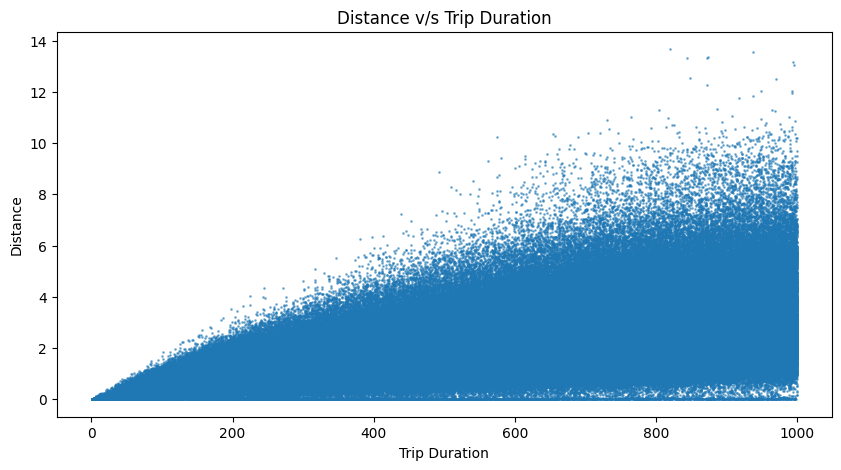

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize = (10,5))
dur_dist = taxi_df.loc[(taxi_df.distance < 30) & (taxi_df.trip_duration < 1000), ['distance','trip_duration']]
plt.scatter(dur_dist.trip_duration, dur_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.title('Distance v/s Trip Duration')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* There should have been a linear relationship between the distance covered and trip duration on an average but we can see dense collection of the trips in the lower right corner which showcase many trips with the inconsistent readings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* We should remove those trips which covered 0 mile distance but clocked more than 1 minute to make our data more consistent for predictive model. Because if the trip was cancelled after booking, than that should not have taken more than a minute time. This is our assumption.

#### Chart - 11

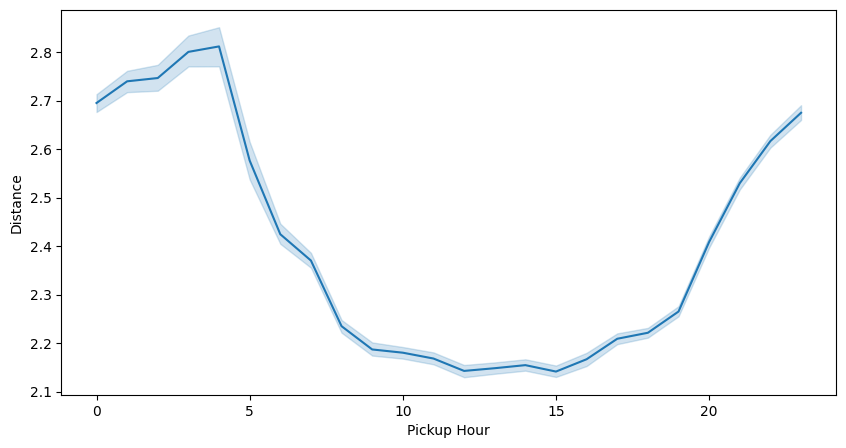

In [ ]:
# Chart - 11 visualization code
# Setting the figure size for the plot
plt.figure(figsize=(10, 5))

# Creating a lineplot to visualize the relationship between pickup hour and distance
sns.lineplot(y='distance', x='pickup_hour', data=taxi_df)

# Labeling the y and x axes for clarity
plt.ylabel('Distance (miles)')  # Label for the y-axis
plt.xlabel('Pickup Hour (24hr format)')  # Label for the x-axis

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

* A line chart helps to show the relationship between two variables, typically to demonstrate trends or patterns over a continuous range or time.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***